# Simulation for PCA

In [2]:
from mcbj import *
from pca_and_ml import *
from noise import *
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import pandas as pd
import re

import filter_traces
import plots

date = "22_03_23"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f'//DATACENTER/BreakJunction_group/BJ_Data/{date}')

In [123]:
# conductance interval 0-1 [a.u.]
# 20 bin
# 10000 traces

## Simulation 1D single histograms of plateaus and tunnel traces
sim_data_temp_plat : temporal histogram of 10_000 single histograms of simulated plateaus
sim_data_temp_tunnel : temporal histogram of 10_000 single histograms of simulated tunnel traces

In [311]:
np.concatenate([(list([i]*500 for i in range(10, 30)))]).flatten()

(10000,)

In [312]:
sim_data_inds_1000 = np.random.randint(10, 30, 1000, dtype=int)
sim_data_inds_10000 = np.random.randint(10, 30, 10000, dtype=int)
sim_data_inds_non_rand = np.concatenate([(list([i]*500 for i in range(10, 30)))]).flatten()

In [277]:
np.unique(sim_data_inds_10000, return_counts=True)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29]),
 array([473, 491, 502, 497, 529, 507, 499, 503, 505, 496, 488, 562, 472,
        527, 483, 466, 493, 498, 479, 530], dtype=int64))

In [313]:
xbins, hist_1d_1000 = utils.calc_hist_1d_single(data=sim_data_inds_1000, xrange=(0, 40), xbins_num=41, log_scale=False)
xbins, hist_1d_10000 = utils.calc_hist_1d_single(data=sim_data_inds_10000, xrange=(0, 40), xbins_num=41, log_scale=False)
xbins, hist_1d_non_rand = utils.calc_hist_1d_single(data=sim_data_inds_non_rand, xrange=(0, 40), xbins_num=41, log_scale=False)

In [315]:
sim_data_temp_plat = np.zeros((40, 10000))
sim_data_temp_plat_non_rand = np.zeros((40, 10000))

In [316]:
# sim_data_inds_10000

In [317]:
for i, ind in enumerate(sim_data_inds_10000):
    # print(i, ind)
    sim_data_temp_plat[ind, i] = 1

In [318]:
for i, ind in enumerate(sim_data_inds_non_rand):
    # print(i, ind)
    sim_data_temp_plat_non_rand[ind, i] = 1

In [282]:
# sim_data_temp[:, 2]

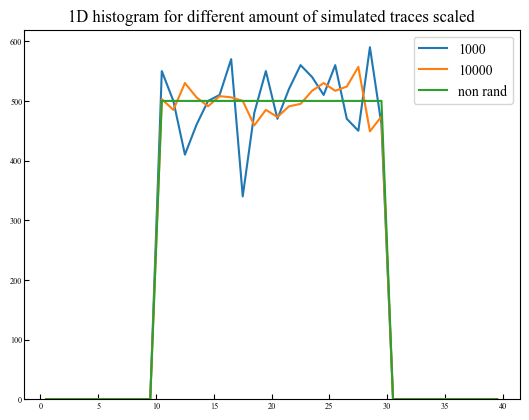

In [320]:
fig, ax = plt.subplots(1)
ax.plot(xbins, hist_1d_1000*10, label='1000')
ax.plot(xbins, hist_1d_10000, label='10000')
ax.plot(xbins, hist_1d_non_rand, label='non rand')
ax.set_ylim(0)
ax.set_title('1D histogram for different amount of simulated traces scaled')
ax.legend()

In [207]:
sim_data_temp_tunnel = np.vstack((np.zeros((10, 10000)), np.ones((20, 10000))/20, np.zeros((10, 10000))))  # np.ones((20, 10000))/20
sim_data_len_10000 = np.random.random(10000)

In [208]:
np.vstack((np.zeros((10, 10000)), np.ones((20, 10000))/20, np.zeros((10, 10000)))).shape

(40, 10000)

In [209]:
sim_data_len_10000

array([0.17120786, 0.61652878, 0.81099831, ..., 0.93024965, 0.40509578,
       0.99468369])

In [210]:
for i, val in enumerate(sim_data_len_10000):
    sim_data_temp_tunnel[:, i] = sim_data_temp_tunnel[:, i]*val

In [211]:
sim_data_temp_tunnel.shape

(40, 10000)

In [212]:
sim_data_temp_tunnel.sum(axis=1)

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        , 249.22195578, 249.22195578,
       249.22195578, 249.22195578, 249.22195578, 249.22195578,
       249.22195578, 249.22195578, 249.22195578, 249.22195578,
       249.22195578, 249.22195578, 249.22195578, 249.22195578,
       249.22195578, 249.22195578, 249.22195578, 249.22195578,
       249.22195578, 249.22195578,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ])

# PCA for simulated plateau traces

In [525]:
# calculate histogram
hist_plat = Histogram(folder=home_folder,
                      start_trace=1,
                      end_trace=10000,
                      conductance_range=(0, 40),
                      conductance_log_scale=False,
                      conductance_bins_num=40,
                      conductance_bins_mode='total')

In [526]:
sim_data_temp_plat.shape[1]

10000

In [527]:
hist_plat.temporal_hist_pull = sim_data_temp_plat.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_plat.hist_1d_bins = xbins
hist_plat.hist_1d_pull = sim_data_temp_plat.sum(axis=1)/sim_data_temp_plat.shape[1]
# make push the same for convenience
hist_plat.temporal_hist_push = sim_data_temp_plat.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_plat.hist_1d_push = sim_data_temp_plat.sum(axis=1)/sim_data_temp_plat.shape[1]

In [528]:
# calculate correlation based on the simulated histograms
hist_plat.calc_corr_hist_2d()

  0%|          | 0/10000 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:1650: RuntimeWarning: invalid value encountered in true_divide
  self.cross_corr_2d /= np.sqrt(np.outer(np.diag(self.corr_2d_pull), np.diag(self.corr_2d_push)))
D:\mcbj_stmbj\mcbj.py:1651: RuntimeWarning: invalid value encountered in true_divide
  self.corr_2d_pull /= np.sqrt(np.outer(np.diag(self.corr_2d_pull), np.diag(self.corr_2d_pull)))
D:\mcbj_stmbj\mcbj.py:1652: RuntimeWarning: invalid value encountered in true_divide
  self.corr_2d_push /= np.sqrt(np.outer(np.diag(self.corr_2d_push), np.diag(self.corr_2d_push)))


In [529]:
np.nan_to_num(hist_plat.corr_2d_pull, copy=False)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [530]:
for i in range(hist_plat.corr_2d_pull.shape[0]):
    hist_plat.corr_2d_pull[i, i] = 1

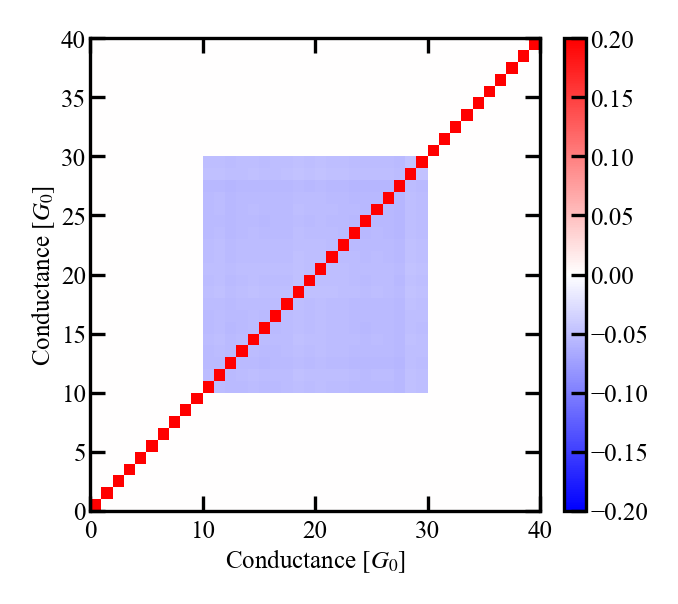

In [531]:
ax_corr, ax_cbar = hist_plat.plot_corr(mode='pull', dpi=300, vmax=0.2, vmin=-0.2)
# ax_corr.axhline(1, ls='--', lw=0.5, c='k')
# ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [532]:
hist_plat.corr_2d_pull

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [533]:
pc_plat = PCA(hist=hist_plat, num_of_pcs=5)
pc_plat.calc_principal_components(direction='pull')

pc_plat.project_to_pcs()
pc_plat.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_plat.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

(0.0, 0.058485)

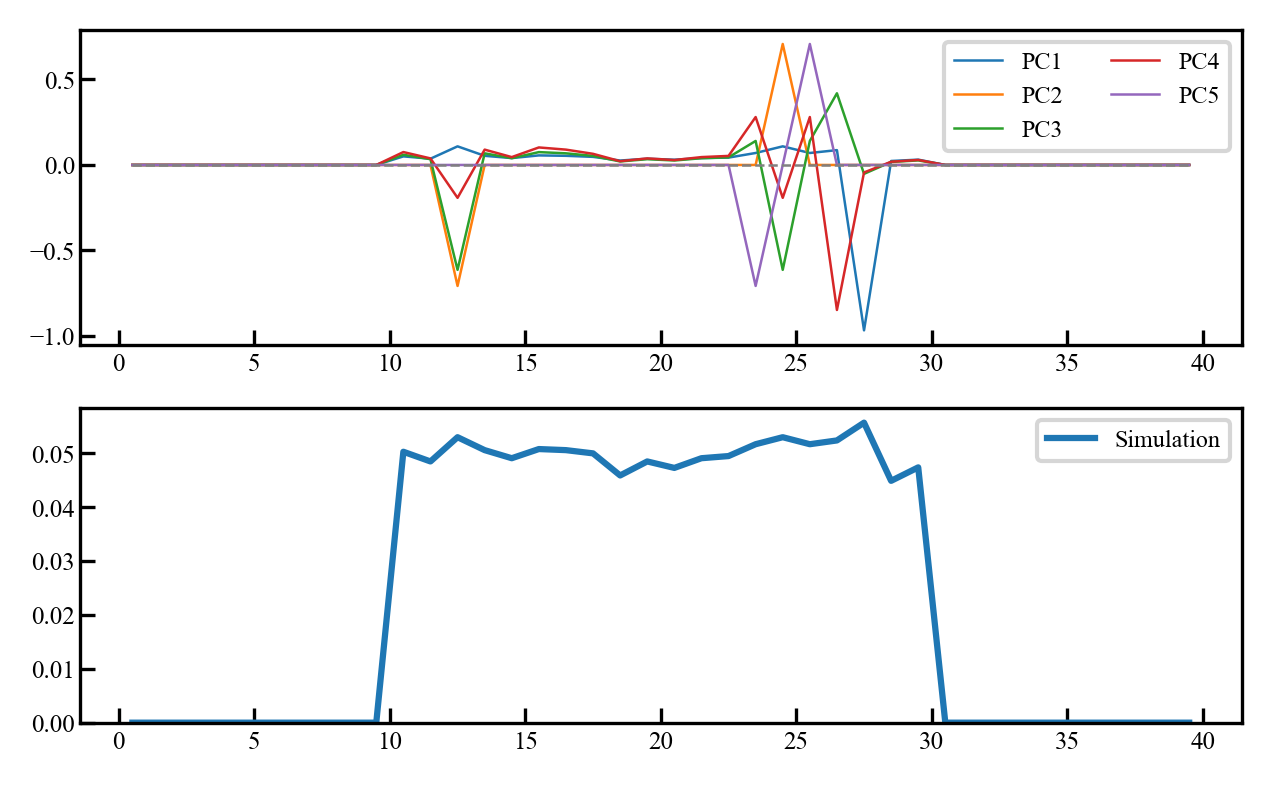

In [534]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_plat.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
ax2.plot(hist_plat.hist_1d_bins, hist_plat.hist_1d_pull, label='Simulation')
# ax1.axvline(1, ls='--', lw=1, c='k')
# ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
# ax1.set_xscale('log')
# ax2.set_xscale('log')
ax2.set_ylim(0)

In [535]:
pc_plat.pc_vals

{'PC1': 0.026466821077609996,
 'PC2': 0.026399155227032754,
 'PC3': 0.026392344870114347,
 'PC4': 0.026377577233765454,
 'PC5': 0.02636296530633788}

In [295]:
for pc_key in pc_plat.pc_keys:
    pc_plat.hist_group1[pc_key] = Histogram(folder=home_folder,
                                            traces=pc_plat.traces_group1[pc_key]-1,
                                            conductance_range=(0, 20),
                                            conductance_log_scale=False,
                                            conductance_bins_num=20,
                                            conductance_bins_mode='total')
    pc_plat.hist_group2[pc_key] = Histogram(folder=home_folder,
                                            traces=pc_plat.traces_group2[pc_key]-1,
                                            conductance_range=(0, 20),
                                            conductance_log_scale=False,
                                            conductance_bins_num=20,
                                            conductance_bins_mode='total')
    
    pc_plat.hist_group1[pc_key].hist_1d_bins = hist_plat.hist_1d_bins
    pc_plat.hist_group2[pc_key].hist_1d_bins = hist_plat.hist_1d_bins
    pc_plat.hist_group1[pc_key].hist_1d_pull = hist_plat.temporal_hist_pull[pc_plat.hist_group1[pc_key].traces, :].sum(axis=0)/pc_plat.hist_group1[pc_key].traces.shape[0]
    pc_plat.hist_group2[pc_key].hist_1d_pull = hist_plat.temporal_hist_pull[pc_plat.hist_group2[pc_key].traces, :].sum(axis=0)/pc_plat.hist_group2[pc_key].traces.shape[0]

In [296]:
pc_plat.hist_group1[pc_key].traces.shape[0]

2000

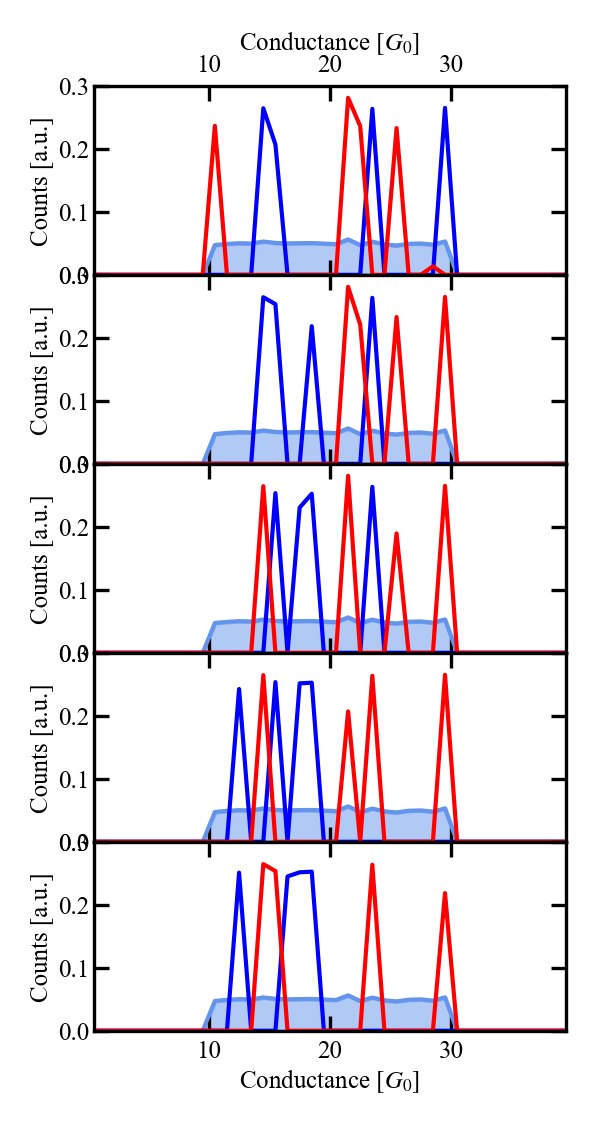

In [297]:
fig = plt.figure(figsize=utils.cm2inch(5, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=pc_plat.num_of_pcs, ncols=1, height_ratios=(1, )*pc_plat.num_of_pcs,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

axs_1d = []

for i, pc_key in enumerate(pc_plat.pc_keys):
    axs_1d.append(fig.add_subplot(gs[i]))
    
    if i%pc_plat.num_of_pcs == 0:
        axs_1d[i].xaxis.tick_top()
        axs_1d[i].xaxis.set_label_position('top')
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')

    axs_1d[i] = hist_plat.plot_hist_1d(ax = axs_1d[i], direction='pull', lw=1)
    axs_1d[i].plot(pc_plat.hist_group1[pc_key].hist_1d_bins, pc_plat.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
    axs_1d[i].plot(pc_plat.hist_group2[pc_key].hist_1d_bins, pc_plat.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
    
    axs_1d[i].set_ylim(0,0.3)
    axs_1d[i].set_ylabel('Counts [a.u.]')

# PCA for non random simulated plateau traces

In [536]:
# calculate histogram
hist_plat = Histogram(folder=home_folder,
                      start_trace=1,
                      end_trace=10000,
                      conductance_range=(0, 40),
                      conductance_log_scale=False,
                      conductance_bins_num=40,
                      conductance_bins_mode='total')

In [537]:
sim_data_temp_plat.shape[1]

10000

In [538]:
hist_plat.temporal_hist_pull = sim_data_temp_plat_non_rand.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_plat.hist_1d_bins = xbins
hist_plat.hist_1d_pull = sim_data_temp_plat_non_rand.sum(axis=1)/sim_data_temp_plat_non_rand.shape[1]
# make push the same for convenience
hist_plat.temporal_hist_push = sim_data_temp_plat_non_rand.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_plat.hist_1d_push = sim_data_temp_plat_non_rand.sum(axis=1)/sim_data_temp_plat_non_rand.shape[1]

In [539]:
# calculate correlation based on the simulated histograms
hist_plat.calc_corr_hist_2d()

  0%|          | 0/10000 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:1650: RuntimeWarning: invalid value encountered in true_divide
  self.cross_corr_2d /= np.sqrt(np.outer(np.diag(self.corr_2d_pull), np.diag(self.corr_2d_push)))
D:\mcbj_stmbj\mcbj.py:1651: RuntimeWarning: invalid value encountered in true_divide
  self.corr_2d_pull /= np.sqrt(np.outer(np.diag(self.corr_2d_pull), np.diag(self.corr_2d_pull)))
D:\mcbj_stmbj\mcbj.py:1652: RuntimeWarning: invalid value encountered in true_divide
  self.corr_2d_push /= np.sqrt(np.outer(np.diag(self.corr_2d_push), np.diag(self.corr_2d_push)))


In [540]:
np.nan_to_num(hist_plat.corr_2d_pull, nan=0, copy=False)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [541]:
for i in range(hist_plat.corr_2d_pull.shape[0]):
    hist_plat.corr_2d_pull[i, i] = 1

In [542]:
hist_plat.corr_2d_pull

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

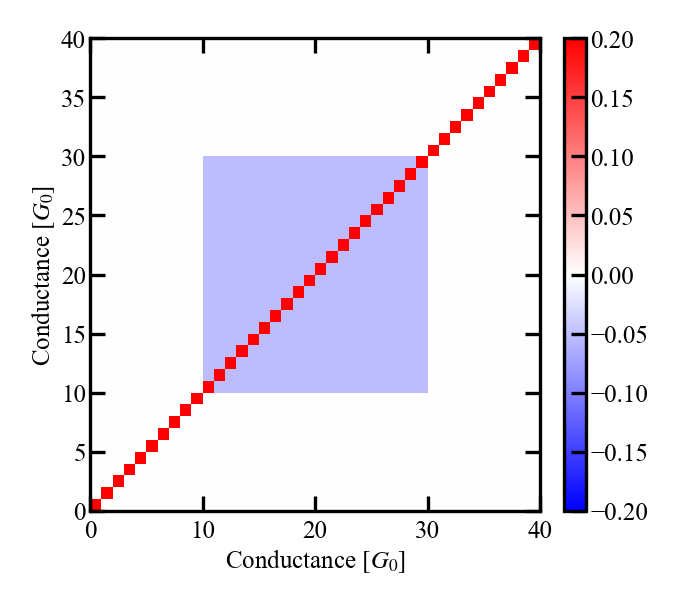

In [543]:
ax_corr, ax_cbar = hist_plat.plot_corr(mode='pull', dpi=300, vmax=0.2, vmin=-0.2)
# ax_corr.axhline(1, ls='--', lw=0.5, c='k')
# ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [544]:
# np.unique(hist_plat.corr_2d_pull)

In [545]:
# hist_plat.corr_2d_pull = np.zeros((11, 11))
# hist_plat.corr_2d_pull[3:8, 3:8] = np.ones((5, 5))*-0.05
# hist_plat.corr_2d_pull[np.arange(0, 11, 1), np.arange(0, 11, 1)] = 1

In [546]:
# hist_plat.hist_1d_bins = np.arange(0, 11, 1)

In [547]:
# hist_plat.corr_2d_pull

In [548]:
w, v = np.linalg.eigh(hist_plat.corr_2d_pull)
print(w)
print(w/sum(w))

[7.76286693e-15 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.05263158e+00 1.05263158e+00 1.05263158e+00
 1.05263158e+00 1.05263158e+00 1.05263158e+00 1.05263158e+00
 1.05263158e+00 1.05263158e+00 1.05263158e+00 1.05263158e+00
 1.05263158e+00 1.05263158e+00 1.05263158e+00 1.05263158e+00
 1.05263158e+00 1.05263158e+00 1.05263158e+00 1.05263158e+00]
[1.94071673e-16 2.50000000e-02 2.50000000e-02 2.50000000e-02
 2.50000000e-02 2.50000000e-02 2.50000000e-02 2.50000000e-02
 2.50000000e-02 2.50000000e-02 2.50000000e-02 2.50000000e-02
 2.50000000e-02 2.50000000e-02 2.50000000e-02 2.50000000e-02
 2.50000000e-02 2.50000000e-02 2.50000000e-02 2.50000000e-02
 2.50000000e-02 2.63157895e-02 2.63157895e-02 2.63157895e-02
 2.63157895e-02 2.63157

In [549]:
# pc_plat = PCA(hist=hist_plat, num_of_pcs=11)
# pc_plat.calc_principal_components(direction='pull')

In [550]:
# pc_plat.pc_vals

In [556]:
pc_plat = PCA(hist=hist_plat, num_of_pcs=40)
pc_plat.calc_principal_components(direction='pull')

pc_plat.project_to_pcs()
pc_plat.calc_pc_hist_all(num_of_bins=20, hist_min=None, hist_max = None)
pc_plat.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

(0.0, 0.052500000000000005)

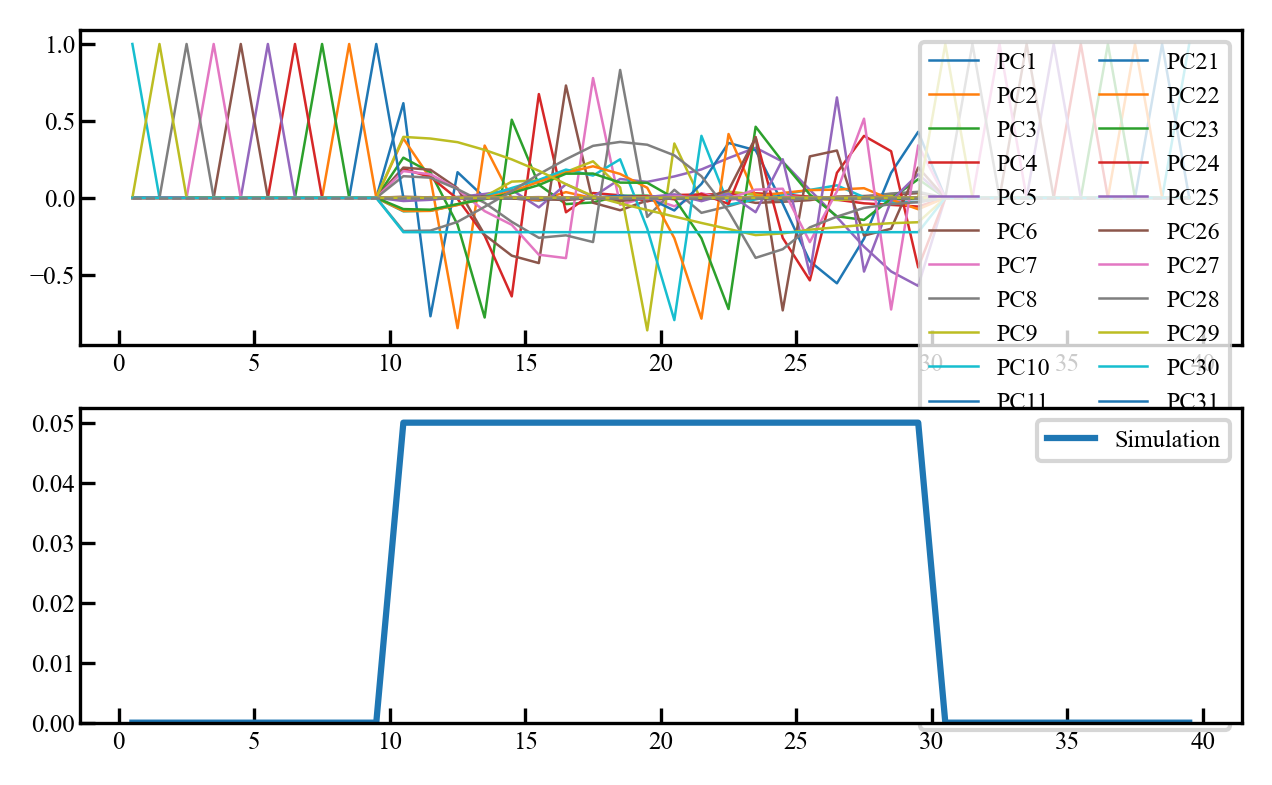

In [557]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_plat.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
ax2.plot(hist_plat.hist_1d_bins, hist_plat.hist_1d_pull, label='Simulation')
# ax1.axvline(1, ls='--', lw=1, c='k')
# ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
# ax1.set_xscale('log')
# ax2.set_xscale('log')
ax2.set_ylim(0)

In [554]:
# ax = pc_plat.plot_pc_hist(pc_key='PC1', plot_groups=True)

In [555]:
pc_plat.pc_vals

{'PC1': 0.026315789473684813,
 'PC2': 0.02631578947368472,
 'PC3': 0.026315789473684653,
 'PC4': 0.02631578947368457,
 'PC5': 0.026315789473684504}

In [428]:
for pc_key in pc_plat.pc_keys:
    pc_plat.hist_group1[pc_key] = Histogram(folder=home_folder,
                                            traces=pc_plat.traces_group1[pc_key]-1,
                                            conductance_range=(0, 20),
                                            conductance_log_scale=False,
                                            conductance_bins_num=20,
                                            conductance_bins_mode='total')
    pc_plat.hist_group2[pc_key] = Histogram(folder=home_folder,
                                            traces=pc_plat.traces_group2[pc_key]-1,
                                            conductance_range=(0, 20),
                                            conductance_log_scale=False,
                                            conductance_bins_num=20,
                                            conductance_bins_mode='total')
    
    pc_plat.hist_group1[pc_key].hist_1d_bins = hist_plat.hist_1d_bins
    pc_plat.hist_group2[pc_key].hist_1d_bins = hist_plat.hist_1d_bins
    pc_plat.hist_group1[pc_key].hist_1d_pull = hist_plat.temporal_hist_pull[pc_plat.hist_group1[pc_key].traces, :].sum(axis=0)/pc_plat.hist_group1[pc_key].traces.shape[0]
    pc_plat.hist_group2[pc_key].hist_1d_pull = hist_plat.temporal_hist_pull[pc_plat.hist_group2[pc_key].traces, :].sum(axis=0)/pc_plat.hist_group2[pc_key].traces.shape[0]

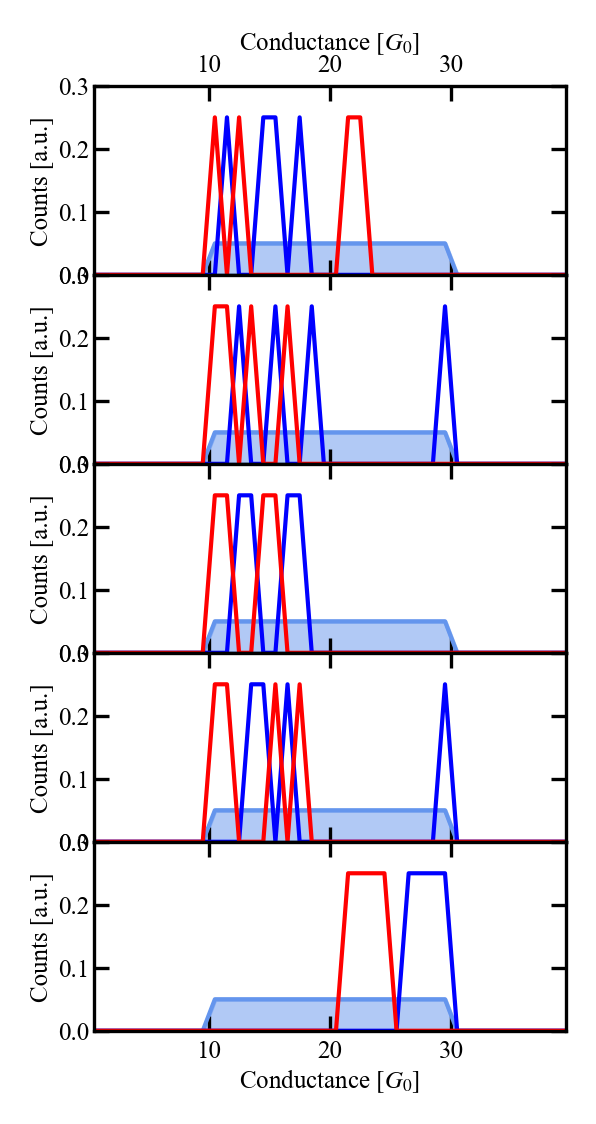

In [429]:
fig = plt.figure(figsize=utils.cm2inch(5, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=pc_plat.num_of_pcs, ncols=1, height_ratios=(1, )*pc_plat.num_of_pcs,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

axs_1d = []

for i, pc_key in enumerate(pc_plat.pc_keys):
    axs_1d.append(fig.add_subplot(gs[i]))
    
    if i%pc_plat.num_of_pcs == 0:
        axs_1d[i].xaxis.tick_top()
        axs_1d[i].xaxis.set_label_position('top')
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')

    axs_1d[i] = hist_plat.plot_hist_1d(ax = axs_1d[i], direction='pull', lw=1)
    axs_1d[i].plot(pc_plat.hist_group1[pc_key].hist_1d_bins, pc_plat.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
    axs_1d[i].plot(pc_plat.hist_group2[pc_key].hist_1d_bins, pc_plat.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
    
    axs_1d[i].set_ylim(0,0.3)
    axs_1d[i].set_ylabel('Counts [a.u.]')

# PCA for simulated tunnel traces

In [558]:
# calculate histogram
hist_tunnel = Histogram(folder=home_folder,
                      start_trace=1,
                      end_trace=10000,
                      conductance_range=(0, 40),
                      conductance_log_scale=False,
                      conductance_bins_num=40,
                      conductance_bins_mode='total')

In [559]:
sim_data_temp_tunnel.shape[1]

10000

In [560]:
hist_tunnel.temporal_hist_pull = sim_data_temp_tunnel.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_tunnel.hist_1d_bins = np.linspace(0, 40, num=40)
hist_tunnel.hist_1d_pull = sim_data_temp_tunnel.sum(axis=1)/sim_data_temp_tunnel.shape[1]
# make push the same for convenience
hist_tunnel.temporal_hist_push = sim_data_temp_tunnel.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_tunnel.hist_1d_push = sim_data_temp_tunnel.sum(axis=1)/sim_data_temp_tunnel.shape[1]

In [561]:
# calculate correlation based on the simulated histograms
hist_tunnel.calc_corr_hist_2d()

  0%|          | 0/10000 [00:00<?, ?it/s]

D:\mcbj_stmbj\mcbj.py:1650: RuntimeWarning: invalid value encountered in true_divide
  self.cross_corr_2d /= np.sqrt(np.outer(np.diag(self.corr_2d_pull), np.diag(self.corr_2d_push)))
D:\mcbj_stmbj\mcbj.py:1651: RuntimeWarning: invalid value encountered in true_divide
  self.corr_2d_pull /= np.sqrt(np.outer(np.diag(self.corr_2d_pull), np.diag(self.corr_2d_pull)))
D:\mcbj_stmbj\mcbj.py:1652: RuntimeWarning: invalid value encountered in true_divide
  self.corr_2d_push /= np.sqrt(np.outer(np.diag(self.corr_2d_push), np.diag(self.corr_2d_push)))


In [562]:
np.nan_to_num(hist_tunnel.corr_2d_pull, copy=False)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [563]:
hist_tunnel.corr_2d_pull[np.arange(0, hist_tunnel.corr_2d_pull.shape[0], 1), np.arange(0, hist_tunnel.corr_2d_pull.shape[0], 1)] = 1

In [564]:
np.unique(hist_tunnel.corr_2d_pull, return_counts=True)

(array([0., 1.]), array([1180,  420], dtype=int64))

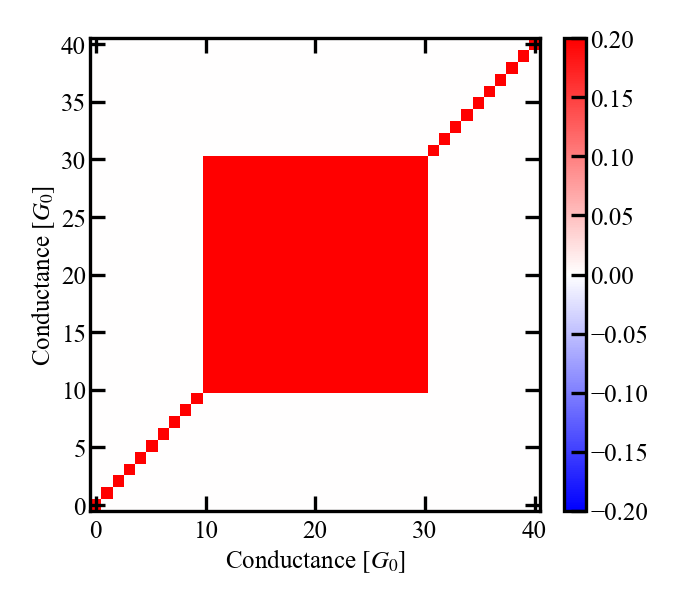

In [583]:
ax_corr, ax_cbar = hist_tunnel.plot_corr(mode='pull', dpi=300, vmax=0.2, vmin=-0.2)
# ax_corr.axhline(1, ls='--', lw=0.5, c='k')
# ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [578]:
pc_tunnel = PCA(hist=hist_tunnel, num_of_pcs=40)
pc_tunnel.calc_principal_components(direction='pull')

pc_tunnel.project_to_pcs()
pc_tunnel.calc_pc_hist_all(num_of_bins=100, hist_min=None, hist_max = None)
pc_tunnel.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

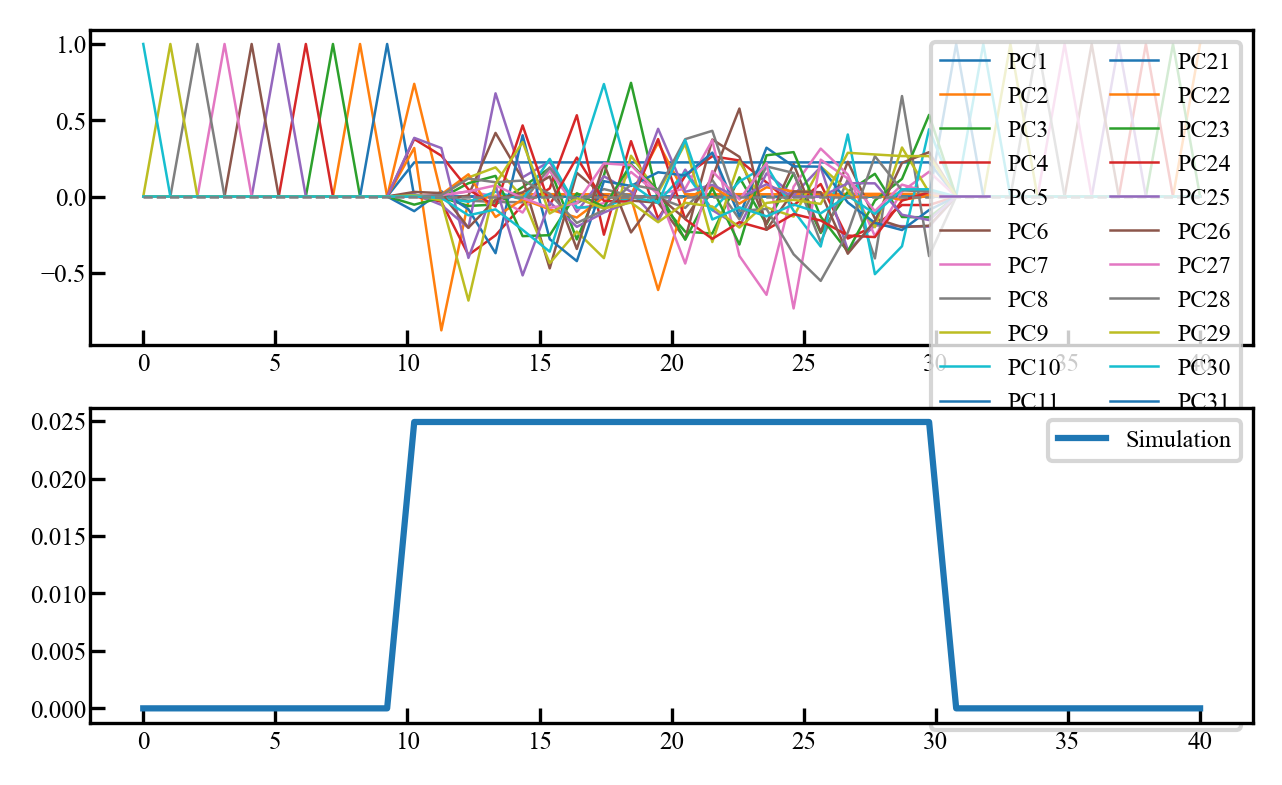

In [579]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_tunnel.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
ax2.plot(hist_tunnel.hist_1d_bins, hist_tunnel.hist_1d_pull, label='Simulation')
# ax1.axvline(1, ls='--', lw=1, c='k')
# ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
# ax1.set_xscale('log')
# ax2.set_xscale('log')
# ax2.set_ylim(0)

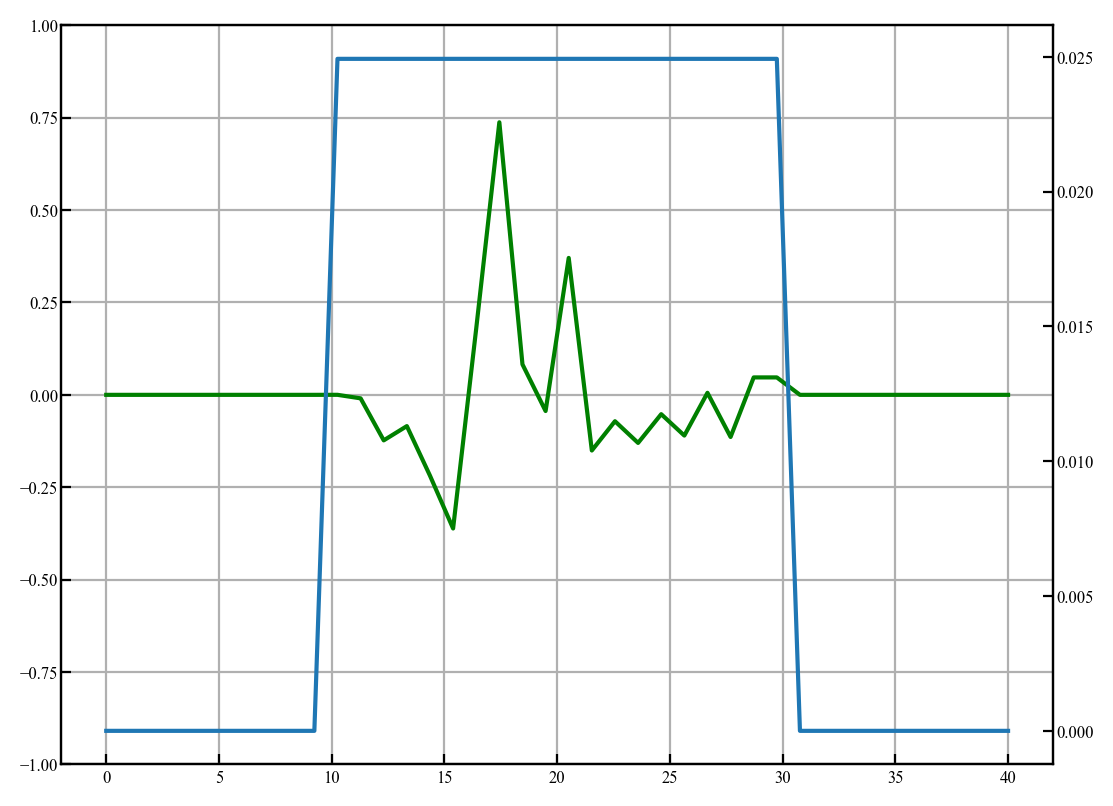

In [582]:
fig, ax = plt.subplots(1, dpi=200)
pc_key='PC40'
ax.plot(pc_tunnel.hist.hist_1d_bins, pc_tunnel.principal_components['PC40'], c='green')
ax.set_ylim(-1, 1)
par = ax.twinx()
par.plot(hist_tunnel.hist_1d_bins, hist_tunnel.hist_1d_pull, label='Simulation')
ax.grid()
# par.plot(pc_tunnel.hist_group1[pc_key].hist_1d_bins, pc_tunnel.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
# par.plot(pc_tunnel.hist_group2[pc_key].hist_1d_bins, pc_tunnel.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')

In [577]:
w, v = np.linalg.eigh(hist_tunnel.corr_2d_pull)
print(w)
print(w/sum(w))

[-2.12857872e-15 -1.47000783e-15 -1.24501208e-15 -8.18151231e-16
 -6.66472908e-16 -5.39409850e-16 -4.67305703e-16 -3.21954069e-16
 -2.12600760e-16 -3.92829822e-17  7.41393078e-17  2.97643202e-16
  4.69231968e-16  7.68795049e-16  9.62865606e-16  1.00604616e-15
  1.69636672e-15  1.85968138e-15  2.60587474e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.00000000e+01]
[-5.32144680e-17 -3.67501959e-17 -3.11253019e-17 -2.04537808e-17
 -1.66618227e-17 -1.34852462e-17 -1.16826426e-17 -8.04885172e-18
 -5.31501899e-18 -9.82074555e-19  1.85348269e-18  7.44108006e-18
  1.17307992e-17  1.92198762e-17  2.40716401e-17  2.51511540e-17
  4.24091679e-17  4.64920345e-17  6.51468684e-17  2.50000000e-02
  2.50000000e-02  2.5000

In [573]:
pc_tunnel.pc_vals

{'PC1': 0.5000000000000001,
 'PC2': 0.024999999999999994,
 'PC3': 0.024999999999999994,
 'PC4': 0.024999999999999994,
 'PC5': 0.024999999999999994,
 'PC6': 0.024999999999999994,
 'PC7': 0.024999999999999994,
 'PC8': 0.024999999999999994,
 'PC9': 0.024999999999999994,
 'PC10': 0.024999999999999994,
 'PC11': 0.024999999999999994,
 'PC12': 0.024999999999999994,
 'PC13': 0.024999999999999994,
 'PC14': 0.024999999999999994,
 'PC15': 0.024999999999999994,
 'PC16': 0.024999999999999994,
 'PC17': 0.024999999999999994,
 'PC18': 0.024999999999999994,
 'PC19': 0.024999999999999994,
 'PC20': 0.024999999999999994,
 'PC21': 0.024999999999999994,
 'PC22': 6.514686839538695e-17,
 'PC23': 4.649203447926577e-17,
 'PC24': 4.240916789881951e-17,
 'PC25': 2.5151153987007405e-17,
 'PC26': 2.40716401396214e-17,
 'PC27': 1.92198762167162e-17,
 'PC28': 1.173079920169031e-17,
 'PC29': 7.44108005529379e-18,
 'PC30': 1.8534826940485567e-18,
 'PC31': -9.820745546717779e-19,
 'PC32': -5.315018990374292e-18,
 'PC33'

In [569]:
for pc_key in pc_tunnel.pc_keys:
    pc_tunnel.hist_group1[pc_key] = Histogram(folder=home_folder,
                                              traces=pc_tunnel.traces_group1[pc_key]-1,
                                              conductance_range=(0, 40),
                                              conductance_log_scale=False,
                                              conductance_bins_num=40,
                                              conductance_bins_mode='total')
    pc_tunnel.hist_group2[pc_key] = Histogram(folder=home_folder,
                                              traces=pc_tunnel.traces_group2[pc_key]-1,
                                              conductance_range=(0, 40),
                                              conductance_log_scale=False,
                                              conductance_bins_num=40,
                                              conductance_bins_mode='total')
    
    pc_tunnel.hist_group1[pc_key].hist_1d_bins = hist_tunnel.hist_1d_bins
    pc_tunnel.hist_group2[pc_key].hist_1d_bins = hist_tunnel.hist_1d_bins
    pc_tunnel.hist_group1[pc_key].hist_1d_pull = hist_tunnel.temporal_hist_pull[pc_tunnel.hist_group1[pc_key].traces, :].sum(axis=0)/pc_tunnel.hist_group1[pc_key].traces.shape[0]
    pc_tunnel.hist_group2[pc_key].hist_1d_pull = hist_tunnel.temporal_hist_pull[pc_tunnel.hist_group2[pc_key].traces, :].sum(axis=0)/pc_tunnel.hist_group2[pc_key].traces.shape[0]

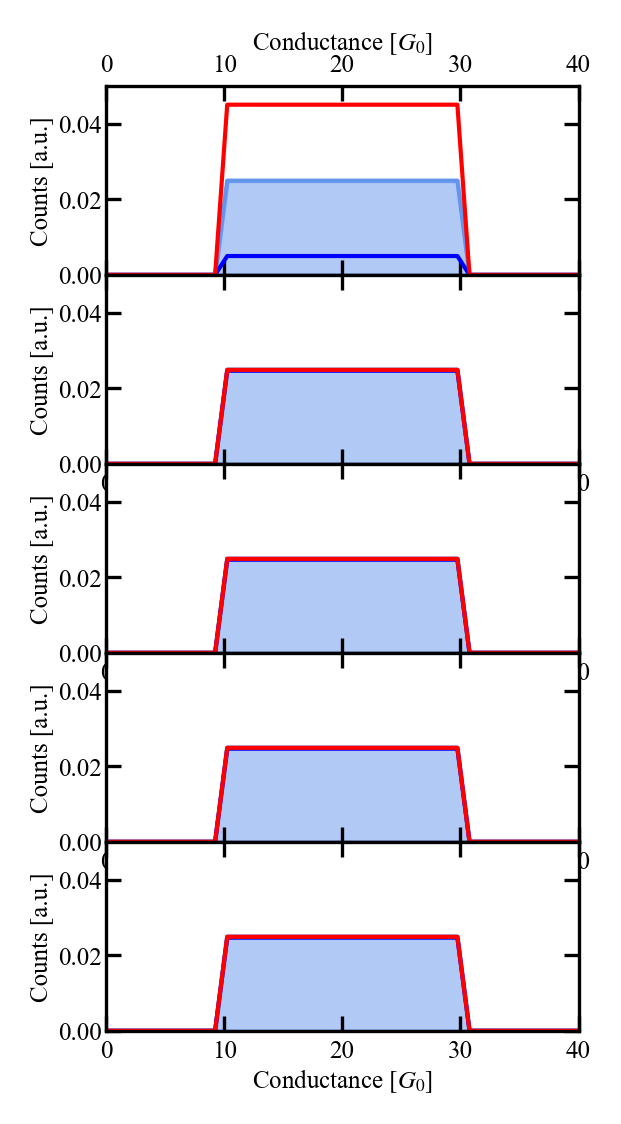

In [570]:
fig = plt.figure(figsize=utils.cm2inch(5, 10), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=pc_tunnel.num_of_pcs, ncols=1, height_ratios=(1, )*pc_tunnel.num_of_pcs,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

axs_1d = []

for i, pc_key in enumerate(pc_tunnel.pc_keys):
    axs_1d.append(fig.add_subplot(gs[i]))
    
    if i%pc_tunnel.num_of_pcs == 0:
        axs_1d[i].xaxis.tick_top()
        axs_1d[i].xaxis.set_label_position('top')
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')

    axs_1d[i] = hist_tunnel.plot_hist_1d(ax = axs_1d[i], direction='pull', lw=1)
    axs_1d[i].plot(pc_tunnel.hist_group1[pc_key].hist_1d_bins, pc_tunnel.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
    axs_1d[i].plot(pc_tunnel.hist_group2[pc_key].hist_1d_bins, pc_tunnel.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
    axs_1d[i].set_ylim(0,0.05)
    axs_1d[i].set_ylabel('Counts [a.u.]')

# PCA for mixed traces

In [435]:
from_which = np.random.random(10000) > 0.5

In [436]:
np.unique(from_which, return_counts=True)

(array([False,  True]), array([4995, 5005], dtype=int64))

In [438]:
sim_data_temp_mix = np.zeros_like(sim_data_temp_tunnel)

In [444]:
print(sim_data_temp_tunnel.shape)
print(sim_data_temp_plat_non_rand.shape)

(40, 10000)
(40, 10000)


In [440]:
sim_data_temp_mix.shape

(40, 10000)

In [463]:
for i, sel in enumerate(from_which):
    if sel:
        ind = np.random.randint(0, 10000)
        sim_data_temp_mix[:, i] = sim_data_temp_tunnel[:, i]
    else:
        ind = np.random.randint(0, 10000)
        sim_data_temp_mix[:, i] = sim_data_temp_plat_non_rand[:, i]

In [465]:
# calculate histogram
hist_mix = Histogram(folder=home_folder,
                      start_trace=1,
                      end_trace=10000,
                      conductance_range=(0, 40),
                      conductance_log_scale=False,
                      conductance_bins_num=40,
                      conductance_bins_mode='total')

In [466]:
sim_data_temp_mix.shape[1]

10000

In [467]:
hist_mix.temporal_hist_pull = sim_data_temp_mix.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_mix.hist_1d_bins = np.linspace(0, 40, num=40)
hist_mix.hist_1d_pull = sim_data_temp_mix.sum(axis=1)/sim_data_temp_mix.shape[1]
# make push the same for convenience
hist_mix.temporal_hist_push = sim_data_temp_mix.T  # need to transpose the simulated temporal histogram, because in the hist class it is stored that way
hist_mix.hist_1d_push = sim_data_temp_mix.sum(axis=1)/sim_data_temp_mix.shape[1]

In [468]:
# calculate correlation based on the simulated histograms
hist_mix.calc_corr_hist_2d()

  0%|          | 0/10000 [00:00<?, ?it/s]

In [469]:
np.nan_to_num(hist_mix.corr_2d_pull, copy=False)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [470]:
hist_mix.corr_2d_pull[np.arange(0, hist_mix.corr_2d_pull.shape[0], 1), np.arange(0, hist_mix.corr_2d_pull.shape[0], 1)] = 1

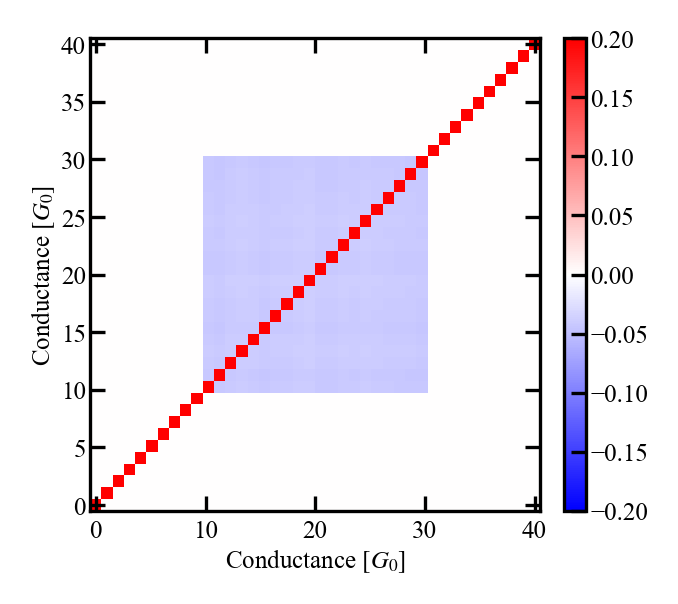

In [471]:
ax_corr, ax_cbar = hist_mix.plot_corr(mode='pull', dpi=300, vmax=0.2, vmin=-0.2)
# ax_corr.axhline(1, ls='--', lw=0.5, c='k')
# ax_corr.axvline(1, ls='--', lw=0.5, c='k')

In [584]:
np.unique(hist_mix.corr_2d_pull)

array([-0.04477143, -0.04425402, -0.04410685, -0.04395603, -0.04380872,
       -0.0436563 , -0.0436563 , -0.0436563 , -0.0436563 , -0.04350884,
       -0.04350884, -0.04350884, -0.04350884, -0.04328973, -0.04312748,
       -0.04305148, -0.04298928, -0.04298928, -0.04298928, -0.04298928,
       -0.04297973, -0.04297537, -0.04290369, -0.04282753, -0.04282279,
       -0.04268992, -0.04268992, -0.04268992, -0.04268992, -0.04267485,
       -0.04266974, -0.04252171, -0.04251622, -0.04245907, -0.04243928,
       -0.04238873, -0.04238873, -0.04238873, -0.04238873, -0.04238873,
       -0.04238873, -0.04238286, -0.04236809, -0.04230653, -0.0422911 ,
       -0.04215903, -0.0421535 , -0.04213032, -0.04208272, -0.04200628,
       -0.042     , -0.04198192, -0.04185712, -0.04185712, -0.04185712,
       -0.04185712, -0.04185304, -0.041846  , -0.04181939, -0.04181939,
       -0.04178069, -0.04178069, -0.04178069, -0.04178069, -0.04176882,
       -0.04170414, -0.04170414, -0.04170414, -0.04170414, -0.04

In [497]:
from matplotlib import colormaps

In [501]:
pc_mix = PCA(hist=hist_mix, num_of_pcs=40, color_map=colormaps['viridis'](np.linspace(0, 1, 40)))
pc_mix.calc_principal_components(direction='pull')

pc_mix.project_to_pcs()
pc_mix.calc_pc_hist_all(num_of_bins=40, hist_min=None, hist_max = None)
pc_mix.select_percentage(percentage=20, calc_histograms=True)

Calculating the projections to PCs.:   0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

In [524]:
sum(pc_mix.principal_components['PC1'])

0.02658864661543936

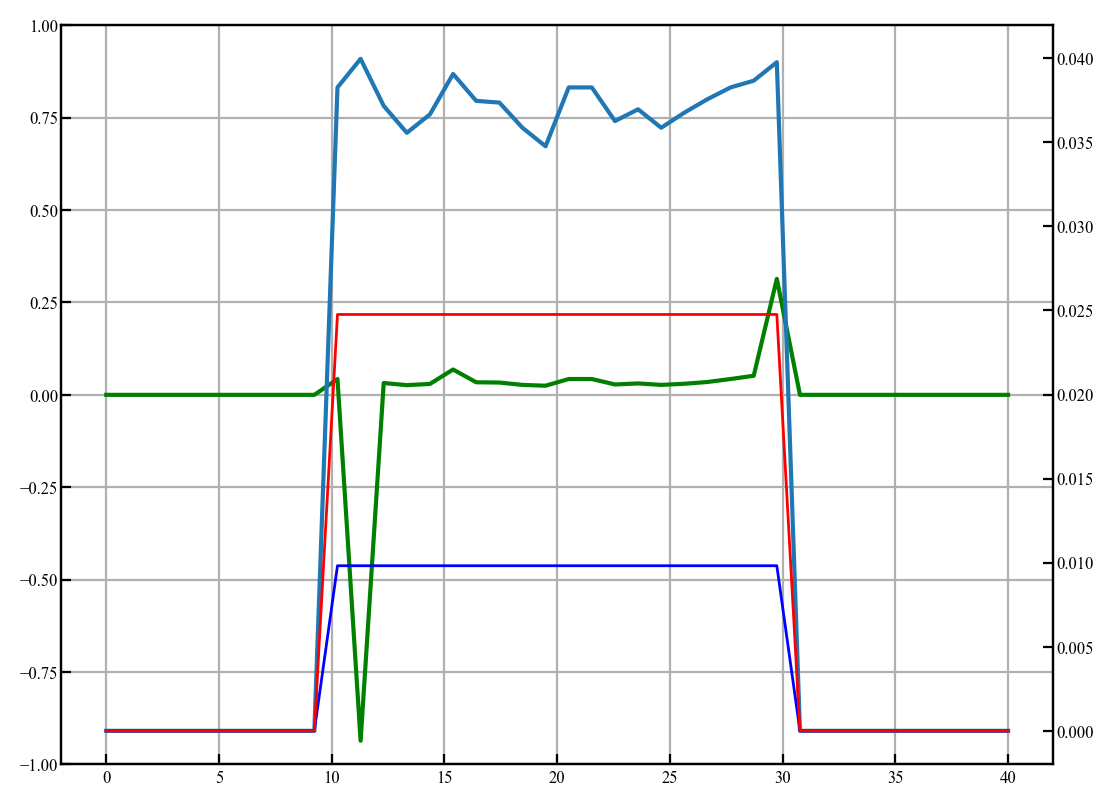

In [523]:
fig, ax = plt.subplots(1, dpi=200)
ax.plot(pc_mix.hist.hist_1d_bins, pc_mix.principal_components['PC1'], c='green')
ax.set_ylim(-1, 1)
par = ax.twinx()
par.plot(hist_mix.hist_1d_bins, hist_mix.hist_1d_pull, label='Simulation')
ax.grid()
par.plot(pc_mix.hist_group1[pc_key].hist_1d_bins, pc_mix.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
par.plot(pc_mix.hist_group2[pc_key].hist_1d_bins, pc_mix.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')

In [521]:
hist_mix.hist_1d_bins

array([ 0.        ,  1.02564103,  2.05128205,  3.07692308,  4.1025641 ,
        5.12820513,  6.15384615,  7.17948718,  8.20512821,  9.23076923,
       10.25641026, 11.28205128, 12.30769231, 13.33333333, 14.35897436,
       15.38461538, 16.41025641, 17.43589744, 18.46153846, 19.48717949,
       20.51282051, 21.53846154, 22.56410256, 23.58974359, 24.61538462,
       25.64102564, 26.66666667, 27.69230769, 28.71794872, 29.74358974,
       30.76923077, 31.79487179, 32.82051282, 33.84615385, 34.87179487,
       35.8974359 , 36.92307692, 37.94871795, 38.97435897, 40.        ])

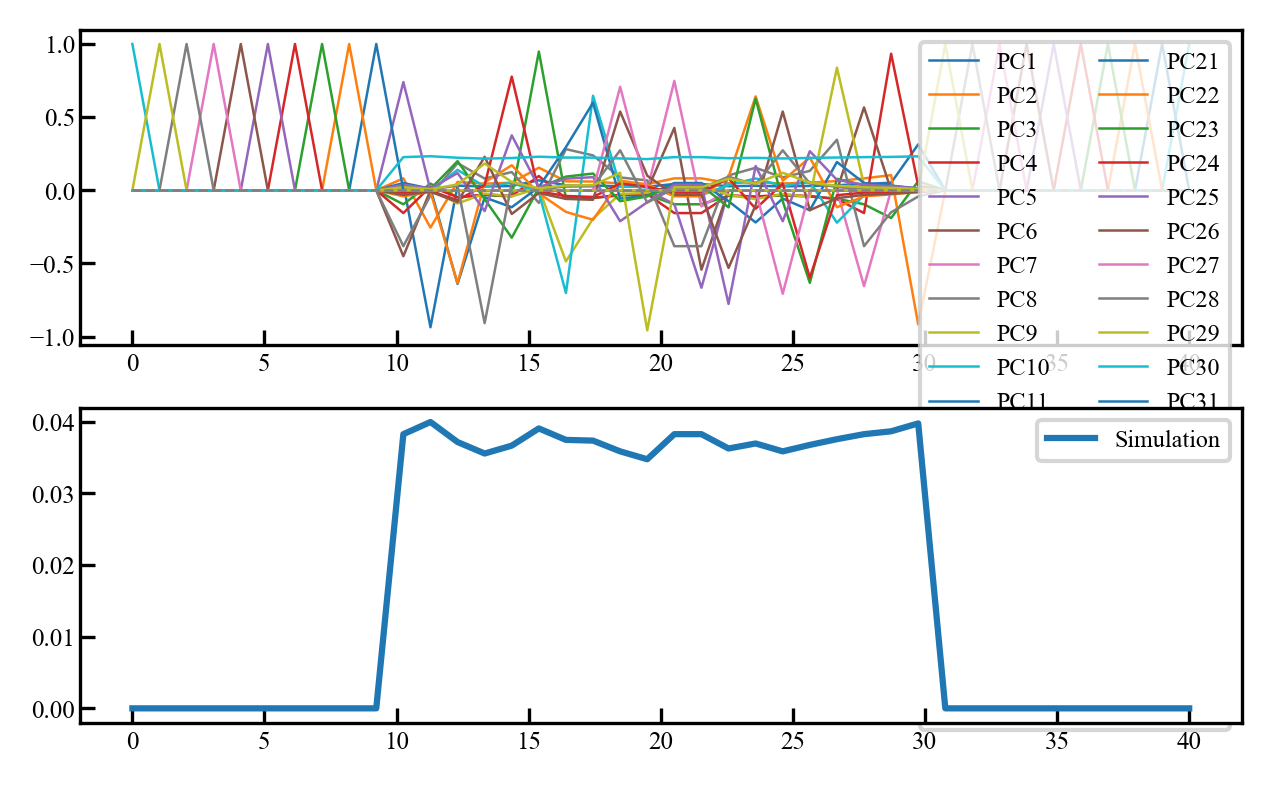

In [502]:
fig, (ax1, ax2) = plt.subplots(nrows=2, dpi=300, figsize=(5, 3))
ax1 = pc_mix.plot_pcs(ax=ax1)
ax1.set_xscale('linear')
ax2.plot(hist_mix.hist_1d_bins, hist_mix.hist_1d_pull, label='Simulation')
# ax1.axvline(1, ls='--', lw=1, c='k')
# ax2.axvline(1, ls='--', lw=1, c='k')
ax2.legend(fontsize='xx-small')
# ax1.set_xscale('log')
# ax2.set_xscale('log')
# ax2.set_ylim(0)

In [503]:
pc_mix.pc_vals

{'PC1': 0.026121204321366838,
 'PC2': 0.026112497444065474,
 'PC3': 0.026087436079416566,
 'PC4': 0.02607279504862655,
 'PC5': 0.02605971833738869,
 'PC6': 0.026059718337388675,
 'PC7': 0.026059718337388654,
 'PC8': 0.02604813065345979,
 'PC9': 0.026031714686036773,
 'PC10': 0.026027450142697407,
 'PC11': 0.026021529329226235,
 'PC12': 0.026013913312993,
 'PC13': 0.026006157547882332,
 'PC14': 0.02600003124807377,
 'PC15': 0.02598800891731915,
 'PC16': 0.025974945410823243,
 'PC17': 0.025966805272846442,
 'PC18': 0.025957712464796327,
 'PC19': 0.02592823994172907,
 'PC20': 0.025,
 'PC21': 0.025,
 'PC22': 0.025,
 'PC23': 0.025,
 'PC24': 0.025,
 'PC25': 0.025,
 'PC26': 0.025,
 'PC27': 0.025,
 'PC28': 0.025,
 'PC29': 0.025,
 'PC30': 0.025,
 'PC31': 0.025,
 'PC32': 0.025,
 'PC33': 0.025,
 'PC34': 0.025,
 'PC35': 0.025,
 'PC36': 0.025,
 'PC37': 0.025,
 'PC38': 0.025,
 'PC39': 0.025,
 'PC40': 0.005462273166475031}

In [504]:
for pc_key in pc_mix.pc_keys:
    pc_mix.hist_group1[pc_key] = Histogram(folder=home_folder,
                                              traces=pc_mix.traces_group1[pc_key]-1,
                                              conductance_range=(0, 40),
                                              conductance_log_scale=False,
                                              conductance_bins_num=40,
                                              conductance_bins_mode='total')
    pc_mix.hist_group2[pc_key] = Histogram(folder=home_folder,
                                              traces=pc_mix.traces_group2[pc_key]-1,
                                              conductance_range=(0, 40),
                                              conductance_log_scale=False,
                                              conductance_bins_num=40,
                                              conductance_bins_mode='total')
    
    pc_mix.hist_group1[pc_key].hist_1d_bins = hist_tunnel.hist_1d_bins
    pc_mix.hist_group2[pc_key].hist_1d_bins = hist_tunnel.hist_1d_bins
    pc_mix.hist_group1[pc_key].hist_1d_pull = hist_tunnel.temporal_hist_pull[pc_mix.hist_group1[pc_key].traces, :].sum(axis=0)/pc_mix.hist_group1[pc_key].traces.shape[0]
    pc_mix.hist_group2[pc_key].hist_1d_pull = hist_tunnel.temporal_hist_pull[pc_mix.hist_group2[pc_key].traces, :].sum(axis=0)/pc_mix.hist_group2[pc_key].traces.shape[0]

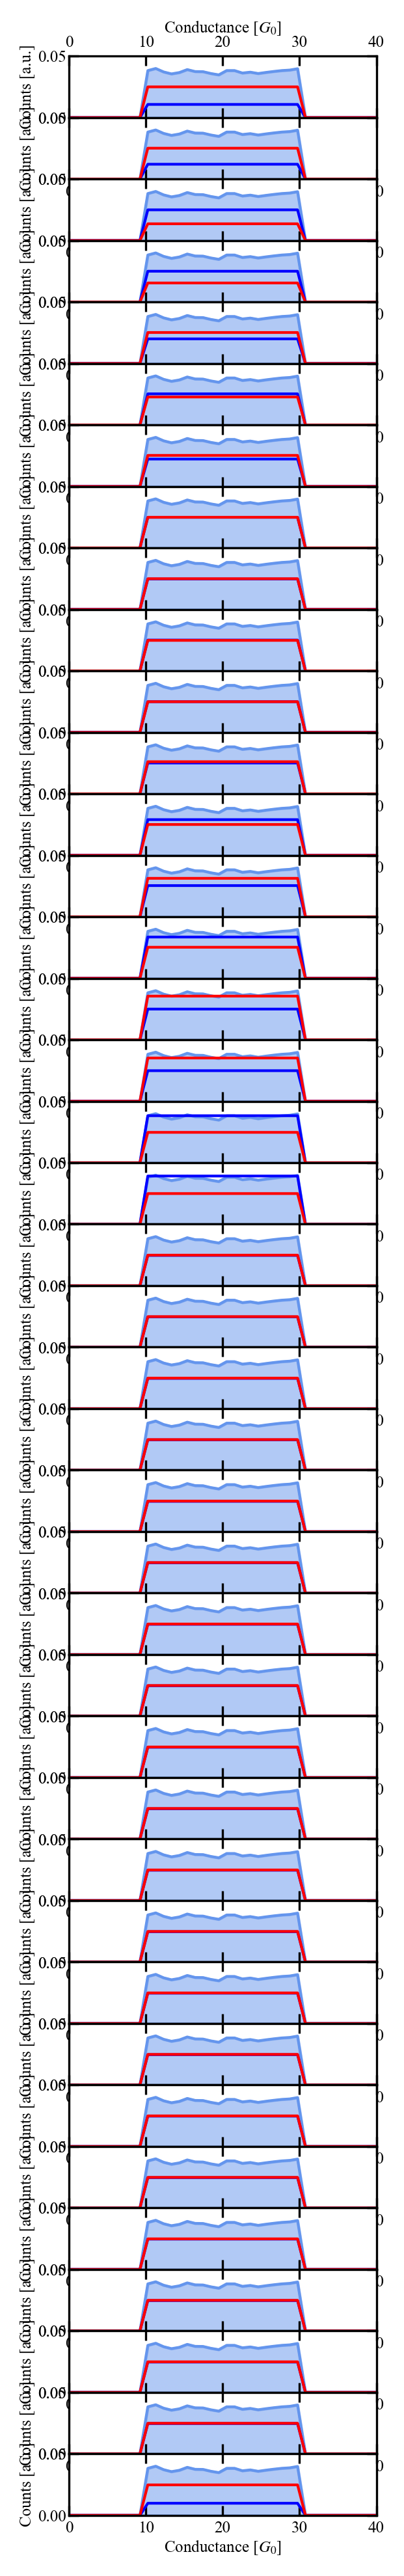

In [506]:
fig = plt.figure(figsize=utils.cm2inch(5, 40), dpi=300)  # figsize: (width, height) in inches
gs = gridspec.GridSpec(nrows=pc_mix.num_of_pcs, ncols=1, height_ratios=(1, )*pc_mix.num_of_pcs,
                       figure=fig, left=0.15, right=0.95, top=0.9, bottom=0.1, wspace=0.25, hspace=0)

axs_1d = []

for i, pc_key in enumerate(pc_mix.pc_keys):
    axs_1d.append(fig.add_subplot(gs[i]))
    
    if i%pc_mix.num_of_pcs == 0:
        axs_1d[i].xaxis.tick_top()
        axs_1d[i].xaxis.set_label_position('top')
    
    axs_1d[i].xaxis.set_ticks_position('both')
    axs_1d[i].yaxis.set_ticks_position('both')

    axs_1d[i] = hist_mix.plot_hist_1d(ax = axs_1d[i], direction='pull', lw=1)
    axs_1d[i].plot(pc_mix.hist_group1[pc_key].hist_1d_bins, pc_mix.hist_group1[pc_key].hist_1d_pull, lw=1, c='b')
    axs_1d[i].plot(pc_mix.hist_group2[pc_key].hist_1d_bins, pc_mix.hist_group2[pc_key].hist_1d_pull, lw=1, c='r')
    axs_1d[i].set_ylim(0,0.05)
    axs_1d[i].set_ylabel('Counts [a.u.]')